In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data in pandas dataframe as df
df=pd.read_csv(r'D:\my_work\ML\insurance_charges_data\insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#description on data
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There is no missing data in the dataframe.

Step 2 exploratory data analysis

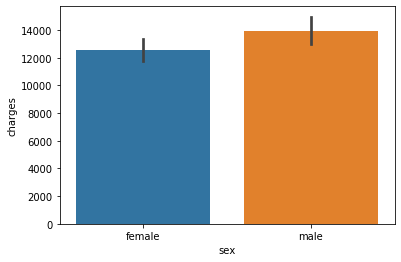

In [7]:
sns.barplot('sex','charges', data=df)

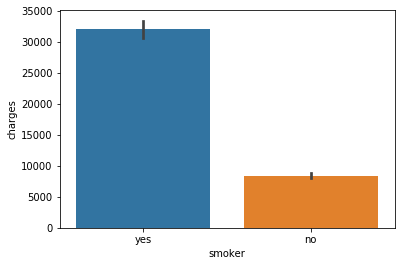

In [8]:
sns.barplot('smoker','charges', data=df)

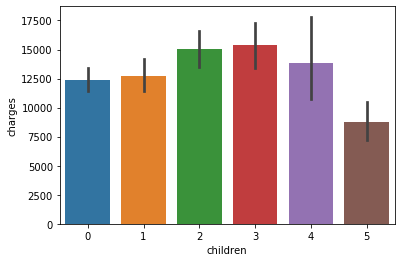

In [9]:
sns.barplot('children','charges', data=df)

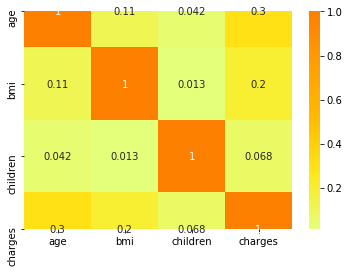

In [13]:
sns.heatmap(df.corr(), annot=True,cmap = 'Wistia')

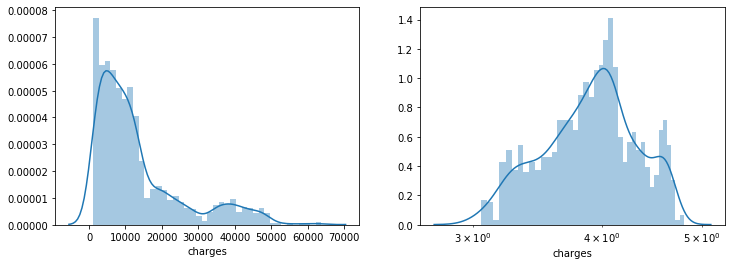

In [18]:
f=plt.figure(figsize=(12,4))
ax=f.add_subplot(121)
sns.distplot(df['charges'],bins=40, ax=ax)

ax=f.add_subplot(122)
sns.distplot(np.log10(df['charges']), bins=40, ax=ax)
ax.set_xscale('log')

From above charges are not normally distributed, but the log of charges is normally distributed. so here on we will use logarithmic charges

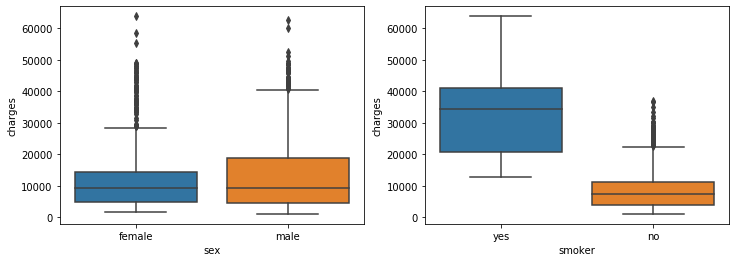

In [20]:
f = plt.figure(figsize=(12,4))
ax = f.add_subplot(121)
sns.boxplot('sex','charges',data=df,ax=ax)

ax = f.add_subplot(122)
sns.boxplot('smoker','charges',data=df,ax=ax)

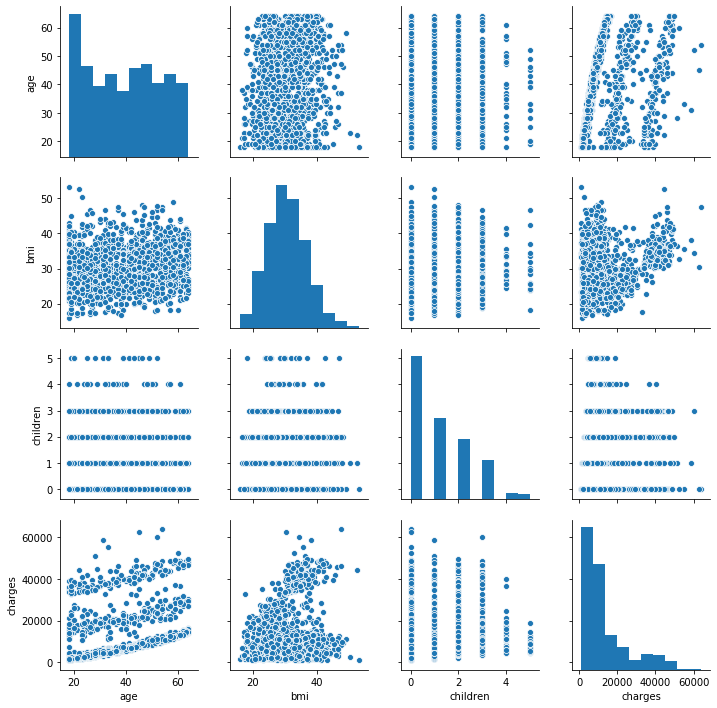

In [21]:
sns.pairplot(df)

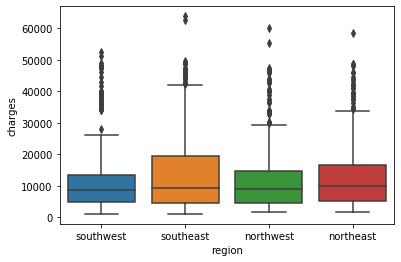

In [25]:
sns.boxplot('region','charges',data=df)

Linear Regression

In [24]:
new_data = df.drop('sex', axis=1)
new_data.head()

,age,bmi,children,smoker,region,charges
0,19,27.900,0,yes,southwest,16884.92400
1,18,33.770,1,no,southeast,1725.55230
2,28,33.000,3,no,southeast,4449.46200
3,33,22.705,0,no,northwest,21984.47061
4,32,28.880,0,no,northwest,3866.85520


In [36]:
temp_df = pd.get_dummies(new_data[['smoker','region']],drop_first=True)
new_data=pd.concat([new_data, temp_df] , axis=1)

In [50]:
new_data.drop(['smoker','region'],axis=1, inplace=True)

In [54]:
new_data['charges'] = np.log10(new_data['charges'])


In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [56]:
X=new_data.drop('charges', axis=1)
y=new_data.charges

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [58]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
y_pred = model.predict(X_test)

In [60]:
r2 = r2_score(y_test,y_pred)
r2

0.7674977855576074